<a href="https://colab.research.google.com/github/Lizzy1616/K-MEANS/blob/main/Copy_of_K_Means_Python_Application4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy pandas matplotlib scikit-learn

Developing K-Means Python Application

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.cluster import KMeans

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [8]:
import sklearn.decomposition as PCA

In [9]:
data = pd.read_csv("updatedd_file.csv")

In [10]:
data.isnull().sum

<bound method DataFrame.sum of          day  month   year  cases  deaths  countries  geoId  countryt_code  \
0      False  False  False  False   False      False  False          False   
1      False  False  False  False   False      False  False          False   
2      False  False  False  False   False      False  False          False   
3      False  False  False  False   False      False  False          False   
4      False  False  False  False   False      False  False          False   
...      ...    ...    ...    ...     ...        ...    ...            ...   
61895  False  False  False  False   False      False  False          False   
61896  False  False  False  False   False      False  False          False   
61897  False  False  False  False   False      False  False          False   
61898  False  False  False  False   False      False  False          False   
61899  False  False  False  False   False      False  False          False   

       data2019  continent  Cumulative  dateRep_float   code  
0         False      False       False          False  False  
1         False      False       False          False  False  
2         False      False       False          False  False  
3         False      False       False          False  False  
4         False      False       False          False  False  
...         ...        ...         ...            ...    ...  
61895     False      False        True          False  False  
61896     False      False        True          False  False  
61897     False      False        True          False  False  
61898     False      False        True          False  False  
61899     False      False        True          False  False  

[61900 rows x 13 columns]>

DATA PROCESSING

In [ ]:
#data_filled_mode = data.fillna(data["day"].mode()[0])

In [ ]:
#data_filled_mode = data.fillna(data["dateRep"].mode()[0])

In [ ]:
#data_filled_mode = data.fillna(data["month"].mode()[0])

In [ ]:
#data_filled_mode = data.fillna(data["year"].mode()[0])

In [ ]:
#data_filled_median = data.fillna(data["cases"].median())

In [ ]:
#data_filled_median = data.fillna(data["deaths"].median())

In [ ]:
#data_filled_mode = data.fillna(data["countries"].mode()[0])

In [ ]:
#data_filled_mode = data.fillna(data["geoId"].mode()[0])

In [ ]:
#data_filled_mode = data.fillna(data["countryt_code"].mode()[0])

In [ ]:
#data_filled_mode = data.fillna(data["data2019"].mode()[0])

In [ ]:
#data_filled_mode = data.fillna(data["continent"].mode()[0])

In [ ]:
#data_filled_mode = data.fillna(data["Cumulative"].mode()[0])

In [ ]:
#data.to_csv("cleaned_file.csv", index=False)

In [ ]:
#data = {"dataRep": ["14/12/2020", "12/12/2020", "13/12/2020"]}

In [ ]:
#data = pd.DataFrame(data)

In [ ]:
#data["dataRep"] = pd.to_datetime(data["dataRep"], format="%d/%m/%Y")

In [ ]:
#data["dataRep_float"] = data["dataRep"].astype("int64") // 10**9

In [11]:
data = pd.read_csv("updatedd_file.csv")

In [12]:
#select only numeric features for dscaling
numeric_features = data.select_dtypes(include=[np.number])

In [13]:
#Handle missing values in the numeric before scaling
numeric_features = numeric_features.fillna(numeric_features.mean())

In [14]:
#apply standard scaler to numeric features only
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

choosing number of clusters

In [15]:
data[numeric_features.columns] = scaled_data

In [16]:
kmeans = KMeans(n_clusters=3)

In [17]:
kmeans.fit(scaled_data)

KMeans(n_clusters=3)

In [18]:
#adding cluster labels
data["cluster"] = kmeans.labels_

/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


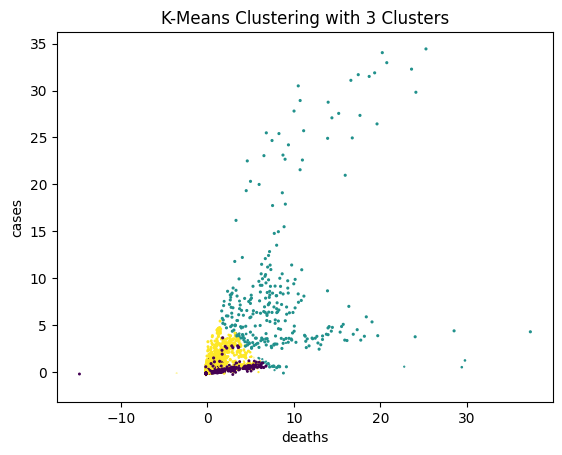

In [19]:
plt.scatter(data["deaths"], data["cases"], data["code"], c=data["cluster"])
plt.xlabel("deaths")
plt.ylabel("cases")
plt.title("K-Means Clustering with 3 Clusters")
plt.show()

Unit Testing

In [20]:
# Select only numeric features for PCA
numeric_features = data.select_dtypes(include=[np.number])


In [21]:
# Select 'cases', 'deaths', and 'code' for PCA
features_for_pca = ['cases', 'deaths', 'code']
pca_data = data[features_for_pca]

In [22]:
# Apply StandardScaler to the selected features
scaler = StandardScaler()
scaled_pca_data = scaler.fit_transform(pca_data)

In [23]:
from sklearn.decomposition import PCA

In [24]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)


In [25]:
# Reduce to 2 principal components
principalComponents = pca.fit_transform(scaled_pca_data)


In [26]:
#Create a new DataFrame with the principal components and 'code' information
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
principalDf['code'] = data['code']

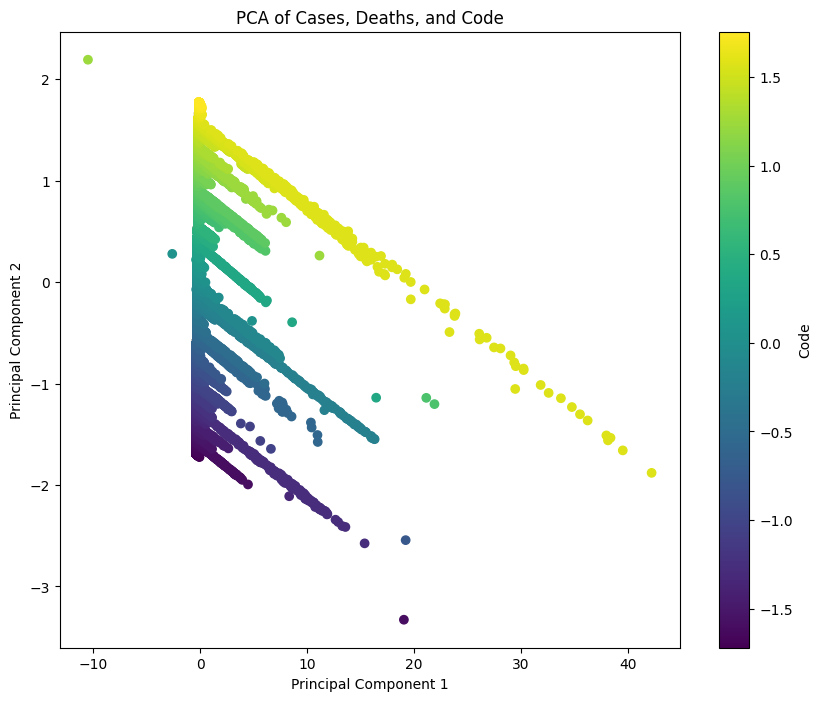

In [27]:
# Visualize the data using the principal components and color by 'code'
plt.figure(figsize=(10, 8))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=principalDf['code'], cmap='viridis') # Use a colormap
plt.title('PCA of Cases, Deaths, and Code')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Code') # Add a colorbar to show the 'code' values
plt.show()

Unit Testing

In [28]:
assert data["cluster"].nunique() == 3, "Number of clusters should be 3"

In [29]:
assert len(data) == len(kmeans.labels_), "The number of labels must equal the number of data lenght"